# MC886A/MO444A - Machine Learning - Project 1
Fabio Akahoshi Collado

Gabriel Akahoshi Collado

## Data
Inicialmente, vamos extrair os dados e preprocessá-los.
Em X_train1 e X_test1 há os dados fornecidos do arquivo cluster.dat.
Em X_train2 e X_test2 há embeddings word2vec em português com dense vectors de 50 dimensões. Para fins desta tarefa, limitamos a quantidade de exemplos a 10.000. Assim, o formato do dataset é (10000, 50). Os embeddings foram baixados do site http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc


In [1]:
import numpy as np
import random
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

filename1 = './cluster.dat'
filename2 = './cbow_s50_simple.dat'

dados1 = np.loadtxt(filename1)
dados2 = np.loadtxt(filename2)

dados1 = preprocessing.StandardScaler().fit(dados1).transform(dados1)
dados2 = preprocessing.StandardScaler().fit(dados2).transform(dados2)

X_train1, X_test1 = train_test_split(dados1, test_size=0.1, shuffle = True)
X_train2, X_test2 = train_test_split(dados2, test_size=0.1, shuffle = True)

print('Formato do Primeiro dataset = {}'.format(dados1.shape))
print('Formato do Segundo dataset = {}'.format(dados2.shape))

Formato do Primeiro dataset = (573, 2)
Formato do Segundo dataset = (10000, 50)


## PART I - Clustering Methods 

Antes de iniciarmos a construção do algoritmo do KMeans, analisamos a estrutura (formato, entrada e saída) da implementação do Scikit Learn. Como faremos a comparação posteriormente, o paralelelismo ajudará. 

A implementação do Scikit Learn cria um objeto com K clusters que pode ser treinado com o método fit, passando os dados em formato matricial como parâmetro, e pode prever a saída com a função predict, passando uma lista de entrada.

In [5]:
%%time
epochs = 10

def atribuir_centroids(n_exemplos, X, K, cluster_centers_):
    assert cluster_centers_.shape[1] == X.shape[1]
    indice_do_centroid = np.zeros(n_exemplos)
    for i in range(n_exemplos):
        distancia = -1
        for j in range(K):
            d2 = np.linalg.norm(cluster_centers_[j] - X[i])
            if d2 < distancia or distancia == -1:
                distancia = d2
                indice_do_centroid[i] = j
    return indice_do_centroid

def encontrar_cluster_centers(n_exemplos, n_features, X, K, indice_do_centroid):
    cluster_centers_ = np.zeros([K, n_features])
    for j in range(K):
        num = 0
        soma = np.zeros(n_features)
        for i in range(n_exemplos):
            if indice_do_centroid[i] == j:
                num = num + 1
                soma = soma + X[i]
        cluster_centers_[j] = soma / num
    return cluster_centers_

class MeuKMeans:
    def __init__(self, n_clusters):
        self.K = n_clusters

    def _inicializar_centroids(self, n_exemplos, n_features, X):
        self.cluster_centers_ = []
        for i in random.sample(range(n_exemplos), self.K):
            self.cluster_centers_.append(X[i])
        self.cluster_centers_ = np.array(self.cluster_centers_)

    def fit(self, X):
        [n_exemplos, n_features] = X.shape
        self._inicializar_centroids(n_exemplos, n_features, X)
        for i in range(epochs):
            self.indice_do_centroid = atribuir_centroids(n_exemplos, X, self.K, self.cluster_centers_)
            self.cluster_centers_ = encontrar_cluster_centers(n_exemplos, n_features, X, self.K, self.indice_do_centroid)

    def predict(self, X):
        [n_exemplos, n_features] = X.shape
        return atribuir_centroids(n_exemplos, X, self.K, self.cluster_centers_)
    


def train_clusterer(Clusterer_Class, K, X_train, n_init = 3):
    score_train = 0
    clusterer = Clusterer_Class(K)
    for i in range(n_init):
        clusterer.fit(X_train)
        predicao = clusterer.predict(X_train)
        score_train_silhouette = max(score_train, metrics.silhouette_score(X_train, predicao))
        score_train_calinski = max(score_train, metrics.calinski_harabasz_score(X_train, predicao))
        
    print('Score X_train_calinski = ', score_train_calinski)
    return clusterer, score_train_silhouette, score_train_calinski

def evaluate_clusterer(clusterer, X_test):
    predicao = clusterer.predict(X_test)
    score_test_silhouette = metrics.silhouette_score(X_test, predicao)
    score_test_calinski = metrics.calinski_harabasz_score(X_test, predicao)
    print('Score X_test_calinski = ', score_test_calinski)
    return score_test_silhouette, score_test_calinski


clusterer, score_train_silhouette, score_train_calinski = train_clusterer(MeuKMeans, 3, X_train2)
evaluate_clusterer(clusterer, X_test2)

clusterer, score_train_silhouette, score_train_calinski = train_clusterer(KMeans, 3, X_train2)
evaluate_clusterer(clusterer, X_test2)

Score X_train_calinski =  420.7999635418138
Score X_test_calinski =  42.92176698969475
Score X_train_calinski =  475.9163800448346
Score X_test_calinski =  50.40309330051019
Wall time: 18.7 s


(0.07537297527305167, 50.40309330051019)

In [ ]:
visualizer = KElbowVisualizer(KMeans, k=(4,12))
visualizer.fit(X_train2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


In [6]:
score_list = []
for K in range(20):
    _, _, score_train = train_clusterer(MeuKMeans, 3, X_train2)
    score_list.append(score_train)


Score X_train_calinski =  384.6519850173019
Score X_train_calinski =  481.86785852373924
Score X_train_calinski =  387.4670320224445
Score X_train_calinski =  481.8647677298938
Score X_train_calinski =  457.13560934925994
Score X_train_calinski =  426.3818068893377
Score X_train_calinski =  423.55700484630444
Score X_train_calinski =  460.06573727371375
Score X_train_calinski =  456.9082017360149
Score X_train_calinski =  334.13309586357764
Score X_train_calinski =  418.4235718758058
Score X_train_calinski =  426.6529181490186
Score X_train_calinski =  441.7172900253901
Score X_train_calinski =  457.1369486019285
Score X_train_calinski =  370.3662981629539
Score X_train_calinski =  435.8421619349184
Score X_train_calinski =  440.54093168449106
Score X_train_calinski =  439.38267633387346
Score X_train_calinski =  457.27039511339433
Score X_train_calinski =  367.86855818023304


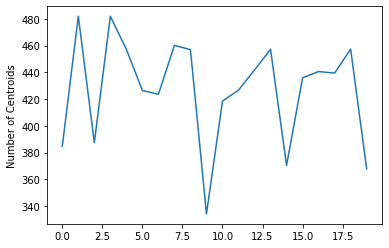

In [7]:
plt.plot(score_list)
plt.ylabel('Silhouette Coefficient')
plt.ylabel('Number of Centroids')
plt.show()

In [ ]:
%%time
class Hierarquical:
    
    def __init__(self, n_clusters):
        self.K = n_clusters
        self.n_cluster_order = 0
        
    def _criar_matrizes(self, X, n_exemplos, n_features):
        self.matriz_distancia = np.zeros([n_exemplos, n_exemplos-1])
        self.indice_do_centroid = np.zeros([n_exemplos])
        self.cluster_centers_ = np.zeros([self.K, n_features])
        
        for i in range(1, n_exemplos):
            for j in range(i):
                self.matriz_distancia[i][j] = np.linalg.norm(X[i] - X[j])
    
    def _juntar(self):
        matriz = self.matriz_distancia
        i, j = np.where(matriz==np.min(matriz[np.nonzero(matriz)]))
        self.matriz_distancia[i[0]][j[0]] = 0
        self.n_cluster_order = self.n_cluster_order + 1
        n_cluster = self.n_cluster_order
        
        if self.indice_do_centroid[i[0]] != 0:
            self.indice_do_centroid[self.indice_do_centroid == self.indice_do_centroid[i[0]]] = n_cluster
        if self.indice_do_centroid[j[0]] != 0:
            self.indice_do_centroid[self.indice_do_centroid == self.indice_do_centroid[j[0]]] = n_cluster
        self.indice_do_centroid[i[0]] = n_cluster
        self.indice_do_centroid[j[0]] = n_cluster
        
        if np.min(self.indice_do_centroid) == 0: return True
        if len(np.unique(self.indice_do_centroid)) <= self.K: return False
        return True
    
    def fit(self, X):
        [n_exemplos, n_features] = X.shape
        self._criar_matrizes(X, n_exemplos, n_features)
        while self._juntar():
            pass
        
        #Reduzir os índices para o menor valor
        j = 0
        for i in np.unique(self.indice_do_centroid):
            self.indice_do_centroid[self.indice_do_centroid == i] = j
            j = j + 1
        
        #Encontrar os centros dos clusters
        self.cluster_centers_ = encontrar_cluster_centers(n_exemplos, n_features, X, self.K, self.indice_do_centroid)


    def predict(self, X):
        [n_exemplos, n_features] = X.shape
        return atribuir_centroids(n_exemplos, X, self.K, self.cluster_centers_)

#print(kmeans.cluster_centers_)

In [ ]:
import matplotlib.pyplot as plt


def plot(X_train, X_test, K, classe_clusterer, titulo):
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(xx.shape)

    # Obtain labels for each point in mesh. Use last trained model.
    clusterer = classe_clusterer(n_clusters=K)
    clusterer.fit(X_test)
    centroides = clusterer.cluster_centers_
    
    Y = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Y.shape)
    # Put the result into a color plot
    Y = Y.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Y, interpolation="nearest",
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect="auto", origin="lower")

    plt.plot(X_train[:, 0], X_train[:, 1], 'k.', markersize=2)

    plt.scatter(centroides[:, 0], centroides[:, 1], marker="x", s=169, linewidths=3,
                color="w", zorder=10)
    plt.title(titulo)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [ ]:
X_test2min = np.array([x[:2] for x in X_test2])
X_test2min.shape
X_train2min = np.array([x[:2] for x in X_train2])

In [ ]:
[1,2,3][:2]

In [ ]:
plot(X_train1, X_test1, 3, Hierarquical, 'Hierarquical')
plot(X_train2min, X_test2min, 3, kMeans, 'kMeans')